In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
import torch.nn.functional as F
from collections import deque
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import pandas as pd
import os
import math
from sklearn.metrics import davies_bouldin_score
import concurrent.futures
import matplotlib.pyplot as plt
import cv2

from RLEnviroment import RL_Agent, NEUEnvironment, Gym
from utils.Loader import NEUDataset
from utils.Perspectiver import Perspectiver

/home/liingfeng/Desktop/pytorch/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def plot_barchartImage(image):
    x = np.arange(image.shape[0])
    y = np.arange(image.shape[1])
    x, y = np.meshgrid(x, y)

    # Flatten arrays for plotting
    x = x.flatten()
    y = y.flatten()
    z = np.zeros_like(x)
    dx = dy = np.ones_like(x)
    dz = image.flatten()

    # Plot the 3D bar chart
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.bar3d(x, y, z, dx, dy, dz, shade=True)

    # Add labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Value')
    ax.set_title('3D Bar Chart of (200, 200) Array')

    plt.show()

In [ ]:
agent = RL_Agent(gamma=0.99, lr=5e-3, epsilon=1.0, epsilon_decay=0.995, min_epsilon=0.01)
dataset = NEUDataset(set="train", scale=0.5)
enviroment = NEUEnvironment(dataset, batch_size=int(len(dataset)/2))
gym = Gym(agent=agent, enviroment=enviroment)
rewards , model = gym.train(num_epochs=200)

In [ ]:
x_values = range(len(rewards))

# Plot the line chart
plt.figure(figsize=(8, 5))
plt.plot(x_values, rewards, marker='o', linestyle='-', color='b', label='Data Points')

# Labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Chart of Given Numbers')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
image , label = dataset.__getitem__(1)
values  = model(image)

sp = float(values[0][0].detach().cpu().numpy())
sr = float(values[0][1].detach().cpu().numpy())

enviroment.calculate_reward(image=image, sp=sp, sr=sr)

2500.0

In [44]:
image = Perspectiver.grayscale_to_rgb(Perspectiver.normalize_to_uint8(image.detach().cpu().numpy()[0]))
image.shape

(100, 100, 3)

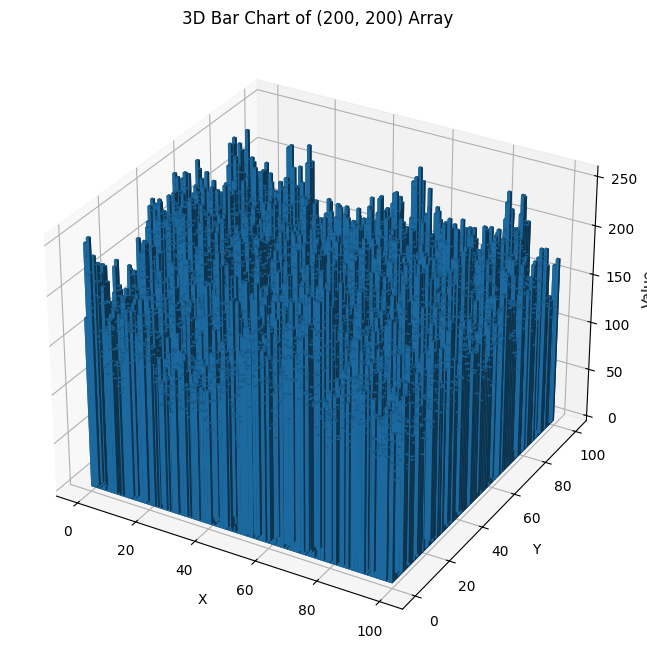

In [47]:
plot_barchartImage(Perspectiver.rgb_to_grayscale(image))

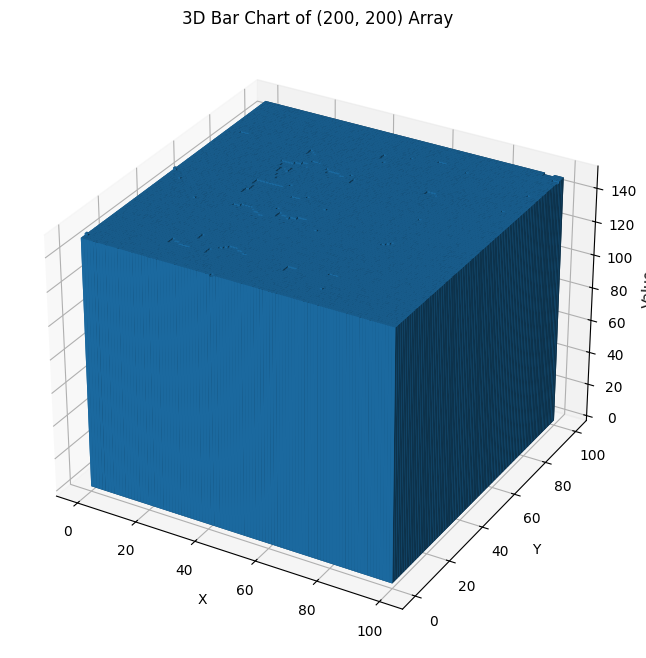

In [48]:
clustered_image = Perspectiver.meanShift(image, float(sp.detach().cpu().numpy()), float(sr.detach().cpu().numpy()))
plot_barchartImage(Perspectiver.rgb_to_grayscale(clustered_image))